<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Neural Networks with Keras

_Authors: Justin Pounders (ATL) and Riley Dallas (ATX)_

---


### Learning Objectives

- Describe the basic `keras` workflow.

keras - we can build neural networks (feed forward so far)

fully - connected means nodes are all connected. 
feed forward - propogated from left to right. 


- Train regression and classification neural networks using `keras`


multiclass problems - topology 

In [1]:
import numpy as np
from sklearn.datasets import make_classification, make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Regression
---

`make_regression` is an excellent library for generating a random regression problem. This helps us focus on the model without having to worry about the dataset. 

In the cell below, use `make_regression` to generate 10,000 samples using 20 features.

In [2]:
X, y = make_regression(n_samples=10000, n_features=20, random_state=42)

### Train/Test Split
---

We always want to have a validation set to test our model. Use the `train_test_split` function to split our `X` and `y` variables into a training set and a holdout set.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### `StandardScaler`
---

You want to scale your data for *any* model that uses Gradient Descent, which includes Neural Networks.

In [4]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

### Your first Neural Network!!
---

Next stop, [The Singularity](https://en.wikipedia.org/wiki/Technological_singularity)!

Creating a model in `keras` entails a few steps:
1. Create your network topology
2. Compile your model
3. Fit your model

We'll cover each step in the cells below.

### Create your network topology
---

We'll create a simple network with:
- an input layer
- one hidden layer. As a general rule, you should use `'relu'` as your activation function for all hidden layers.
- an output layer. 

For *all* regression problems, your output layer will be 1 neuron with *no* activation function. 

In [5]:
model = Sequential()

# input layer 
model.add(Dense(32, # How many neurons do you want in your first layer.
                input_shape=(20,), 
                activation='relu'))

# output layer 
model.add(Dense(1)) # we dont need any activation function 

### Compile your model
---

Whenever you compile your model, you have to specify a few things: 
1. What [loss function](https://keras.io/losses/) to use (depends on if it's regression, classification, etc)
2. What optimizer to use (Always use `'adam'`)
3. Optional: What additional [metrics](https://keras.io/metrics/) you'd like to monitor

In [31]:
# we use mae for gradient descent 

In [6]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

### Fit your model
---

When fitting your model, you need to specify a few things:
1. The number of epochs: start with 10. Always easy to add more
2. Your batch size: pick a number that is a power of 2
3. Your validation data, which in this case is our test set.

In [27]:
model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=10, batch_size=518)

Epoch 1/10
15/15 [==============================] - 0s 4ms/step - loss: 0.5329 - accuracy: 0.7879 - val_loss: 0.5520 - val_accuracy: 0.7744
Epoch 2/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5309 - accuracy: 0.7881 - val_loss: 0.5503 - val_accuracy: 0.7748
Epoch 3/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5290 - accuracy: 0.7891 - val_loss: 0.5487 - val_accuracy: 0.7748
Epoch 4/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5273 - accuracy: 0.7895 - val_loss: 0.5474 - val_accuracy: 0.7752
Epoch 5/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5256 - accuracy: 0.7897 - val_loss: 0.5460 - val_accuracy: 0.7740
Epoch 6/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5240 - accuracy: 0.7912 - val_loss: 0.5439 - val_accuracy: 0.7748
Epoch 7/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5224 - accuracy: 0.7908 - val_loss: 0.5428 - val_accuracy: 0.7752
Epoch 8/10
15/15 [==

### Model predictions
---

Your `keras` model has a `.fit()` method, similar to `sklearn`. The only difference is `keras` returns a 2D `numpy` matrix (`sklearn` returns a 1D `numpy` array).

Try it out in the cell below.

In [8]:
model.predict(X_test_sc)

# should remind you of sklearn 
# not exactly the same, but q similar 

array([[ 5.4972606],
       [ 3.1123395],
       [ 5.231623 ],
       ...,
       [ 2.4636343],
       [ 3.738458 ],
       [-4.1907125]], dtype=float32)

# Binary Classification
---

`make_classification` is similar to `make_regression`, except now we're predicting a class (0 or 1).

In the cell below, use `make_classification` to generate 10,000 samples using 20 features.

In [82]:
X, y = make_classification(n_samples=10_000, n_features=20, random_state=42)

### Train/Test Split
---

We always want to have a validation set to test our model. Use the `train_test_split` function to split our `X` and `y` variables into a training set and a holdout set.

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

### `StandardScaler`
---

You want to scale your data for *any* model that uses Gradient Descent, which includes Neural Networks.

In [84]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

### Network Topology for Binary Classification
---

We'll create a simple network with:
- an input layer, 
- one hidden layer. As a general rule, you should use `'relu'` as your activation function for all hidden layers.
- an output layer. 

For *all* binary classification problems, your output layer will be 1 neuron with `'sigmoid'` activation function. Sigmoid squashes the output of our neuron to a value between 0 and 1, which is great for predicting probabilities. We'll use the probability for our loss function in the next step.

In [85]:
model = Sequential()
model.add(Dense(32,
                input_shape=(20,),
                activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Compile your model
---

Whenever you compile your model, you have to specify a few things: 
1. What loss function to use: For binary classification, use `binary_crossentropy`. ([Description](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html#cross-entropy))
2. What optimizer to use (Always use `'adam'`)
3. Optional: What additional [metrics](https://keras.io/metrics/) you'd like to monitor

In [86]:
model.compile(loss='binary_crossentropy', metrics=['acc'], optimizer='adam')

In [87]:
# we cannot gradient des on accuracy 
# we can compute the acc 

### Fit your model
---

When fitting your model, you need to specify a few things:
1. The number of epochs: start with 10. Always easy to add more
2. Your batch size: pick a number that is a power of 2 (optimizable for hardware chips that runs the algo)
3. Your validation data, which in this case is our test set.

When you fit a model, `keras` returns a `History` object. We need that in the next step, but for now, just save it to a variable.

In [109]:
history = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=30, batch_size=512, verbose=0)

In [110]:
# prob of finding a local minimum can increase when we have batch size too big 

### Visualizing model training
---

Whenever you fit your `keras` model, it returns a `History` object ([link](https://keras.io/visualization/#training-history-visualization)) that can be used for plotting.

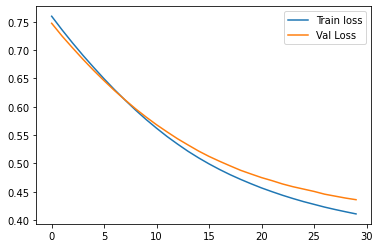

In [111]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend();

### Challenge
---

Using the `history` object, plot the model's accuracy (for both train and test).

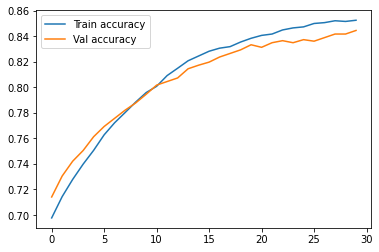

In [113]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.legend();

In [ ]:
# after 10, you can see that the model starts to overfit 

# each epoch runs through all the data
# but each epoch consists of several minibatches 
# after each minibatch size of number of rows is loaded, 
# gradient descent updates the weights 
# as many times per epoch as there are minibaches per epoch

# Multi-class Classification
---

The `make_classification` function allows for multi-class problems as well. Simply increase the `n_classes` and voila!

**NOTE**: You'll need to increase `n_informative` as you increase `n_classes`.

In the cell below, let's create a dataset with three classes.

In [ ]:
X, y = make_classification(n_samples=10000, n_features=20, n_informative=4, n_classes=3)

### One-hot Encoding Targets
---

In `keras`, you have to one-hot encode your `y` if it contains more than two classes. We'll use `keras`' built-in `to_categorical` function to achieve this.

In [ ]:
# use keras encoder 
y = to_categorical(y)
y[:5]

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

### Train/Test Split
---

We always want to have a holdout set to test our model. Use the `train_test_split` function to split our `X` and `y` variables into a training set and a holdout set.

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### `StandardScaler`
---

Use an instance of `StandardScaler` to scale your `X_train` and `X_test` in the cell below.

In [126]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

### Network Topology for Multi-class Classification
---

We'll create a simple network with:
- an input layer
- one hidden layer. As a general rule, you should use `'relu'` as your activation function for all hidden layers.
- an output layer

For *all* multi-class classification problems, your output layer will be the same number of neurons as the number of classes in your problem. The activation function will be `softmax`, which will normalize the predictions into probabilities that sum up to 1.0.

In [127]:
model = Sequential()
model.add(Dense(32, 
                input_shape=(20,),
                activation='relu'))
model.add(Dense(3, activation='softmax'))

### Compile your model
---

Whenever you compile your model, you have to specify a few things: 
1. What loss function to use: For multi-class classification, use `categorical_crossentropy`. ([Description](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html#cross-entropy))
2. What optimizer to use (Always use `'adam'`)
3. Optional: What additional [metrics](https://keras.io/metrics/) you'd like to monitor

In [128]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Fit your model
---

When fitting your model, you need to specify a few things:
1. The number of epochs: start with 10. Always easy to add more
2. Your batch size: pick a number that is a power of 2
3. Your validation data, which in this case is our test set.

In [129]:
history = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=10, batch_size=512)

Epoch 1/10
15/15 [==============================] - 0s 11ms/step - loss: 1.2668 - accuracy: 0.3924 - val_loss: 1.2043 - val_accuracy: 0.4016
Epoch 2/10
15/15 [==============================] - 0s 3ms/step - loss: 1.1438 - accuracy: 0.4225 - val_loss: 1.1030 - val_accuracy: 0.4372
Epoch 3/10
15/15 [==============================] - 0s 3ms/step - loss: 1.0588 - accuracy: 0.4649 - val_loss: 1.0325 - val_accuracy: 0.4828
Epoch 4/10
15/15 [==============================] - 0s 3ms/step - loss: 0.9969 - accuracy: 0.5100 - val_loss: 0.9807 - val_accuracy: 0.5192
Epoch 5/10
15/15 [==============================] - 0s 3ms/step - loss: 0.9506 - accuracy: 0.5528 - val_loss: 0.9392 - val_accuracy: 0.5636
Epoch 6/10
15/15 [==============================] - 0s 3ms/step - loss: 0.9130 - accuracy: 0.5875 - val_loss: 0.9054 - val_accuracy: 0.5944
Epoch 7/10
15/15 [==============================] - 0s 3ms/step - loss: 0.8813 - accuracy: 0.6125 - val_loss: 0.8759 - val_accuracy: 0.6144
Epoch 8/10
15/15 [=

### Visualizing model training
---

Whenever you fit your `keras` model, it returns a `History` object ([link](https://keras.io/visualization/#training-history-visualization)) that can be used for plotting.

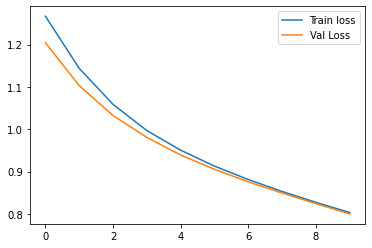

In [130]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend();

### Challenge
---

Using the `history` object, plot the model's accuracy (for both train and test).

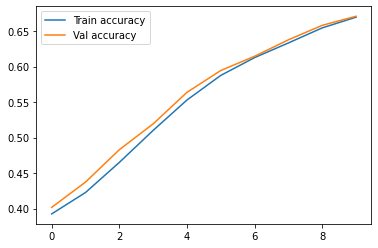

In [131]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.legend();

In [ ]:
# why showing under and overfitting 
# orange shows how model performs on unseen data. 
